In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Machine Learning and Data Mining Project: Analysis of Customer Churn

This project encompasses a comprehensive analysis aimed at predicting and understanding customer churn. Our churn dataset is user data from [KKBox](https://www.kaggle.com/competitions/kkbox-churn-prediction-challenge/overview).

KKBOX offers a subscription based music streaming service. When users signs up for the service, users can choose to either manual renew or auto-renew the service. Users can actively cancel their membership at any time. The criteria of "churn" is no new valid service subscription within 30 days after the current membership expires.

Our approach involves several key stages:

## Data Exploration
- **Objective**: Gain an in-depth understanding of the dataset's structure, features, and summary statistics.
- **Activities**: Examine the dataset to understand its composition and characteristics.

## Data Preprocessing
- **Objective**: Prepare the data for effective analysis.
- **Activities**: 
  - Clean the dataset by addressing issues such as missing values.
  - Transform the data, including encoding categorical variables and normalizing data, to ensure it is suitable for analysis.

## Feature Selection
- **Objective**: Identify the most impactful features for predicting customer churn.
- **Activities**: Use statistical and machine learning techniques to select features that strongly correlate with customer churn.

## Model Building
We will develop and test various predictive models:

### K-Nearest Neighbors (KNN)
- **Approach**: Build a KNN classifier specifically tailored to predict customer churn.

### Ensemble Methods
- **Approach**: Employ advanced ensemble techniques like Random Forest and Gradient Boosting to enhance the prediction accuracy.

### Deep Learning
- **Approach**: Build a deep learning model using a neural network to predict customer churn.

## Model Evaluation
- **Objective**: Assess the performance of our models.
- **Activities**: 
  - Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
  - Compare the performance across different models to identify the most effective approach.

## Insights and Recommendations
- **Objective**: Derive actionable insights from our analysis.
- **Activities**: 
  - Interpret the results and insights gained from the model evaluations.
  - Provide strategic recommendations on how to mitigate customer churn based on our findings.


## Part 1: Data Exploration

The first thing we do is merge the datasets into a single dataframe. We then examine the dataset to understand its composition and characteristics. All of our datasets are keyed off the `msno` column, which is a unique identifier for each customer.

In [78]:
# merge the datasets into a unified dataframe
import pandas as pd
from scripts.get_merged_data import get_merged_data
# df = get_merged_data()
merged_raw_data_url = 'https://drive.google.com/file/d/1WDfh8HLYOtUNuhRZqKCScd1qb4l9sqyj/view?usp=sharing'
merged_raw_data_url = 'https://drive.google.com/uc?id=' + merged_raw_data_url.split('/')[-2]

df = pd.read_csv(merged_raw_data_url)
df = df.set_index('msno')
df.head()


,is_churn,playtime_per_day,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
msno,,,,,,,,,,,,,,,
K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,14106.6695,13,35,0,7,2014,41,30,99,99,1,2017,2017,0
moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,11303.9945,9,28,0,3,2014,38,410,1788,1788,0,2017,2018,0
dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,23121.0130,13,21,0,9,2014,38,90,477,477,0,2017,2017,0
otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=,1,3098.3520,13,0,-1,7,2014,40,30,149,149,1,2017,2017,0
t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=,1,1794.9300,13,0,-1,9,2014,38,30,149,149,0,2017,2017,0


### Data Cleaning

First we'll do some basic data cleaning. We'll check for missing values and remove any duplicate rows.

In [59]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()

# Descriptive statistics for numerical columns
numerical_stats = df.describe()

print(missing_values)
print(duplicate_rows)
print(numerical_stats)
print(df.dtypes)


is_churn                  0
playtime_per_day          0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64
2461
            is_churn  playtime_per_day           city             bd  \
count  346054.000000     346054.000000  346054.000000  346054.000000   
mean        0.069619       7544.414329       6.542988      14.887503   
std         0.254505       8902.479048       6.570736      21.150132   
min         0.000000          0.026000       1.000000   -3152.000000   
25%         0.000000       2126.203625       1.000000       0.000000   
50%         0.000000       4625.273500       4.000000      16.000000   
75%         0.000000       9366.055750      13.000000     

There's only 4 duplicate rows, so we'll just remove them. More impactful is that we can see that Gender is missing a significant number of values, so we can address this with a couple strategies:

- Imputation: Imputing the missing gender values might introduce bias or inaccuracies, especially when almost half of the data is missing.
- Categorization as 'Unknown': This approach involves categorizing missing gender values as 'unknown'. It's a safe and common method, allowing the model to acknowledge the presence of unknown data without making assumptions.
- Predictive Modeling: Create a model to predict the missing gender values based on other features.

We'll go with the 'Unknown' approach for now, but we'll revisit this later and see if we can improve our models by predicting the missing values.

Gender's also encoded as a string, so we'll convert it to a binary variable.


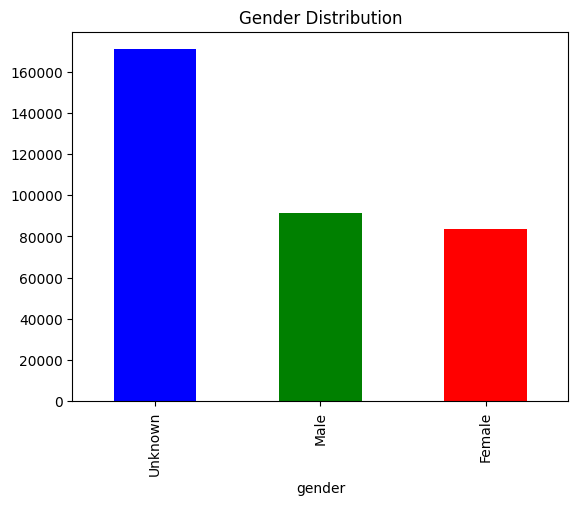

In [51]:
df['gender'] = df['gender'].replace(['female', 'male'], [0, 1]).fillna(-1).astype(int)

# plot gender
gender_counts = df['gender'].value_counts().rename({0: 'Female', 1: 'Male', -1: 'Unknown'})

# Define a color list
colors = ['blue', 'green', 'red']

# Plot the DataFrame with colors
ax = gender_counts.plot(kind='bar', title='Gender Distribution', color=colors)

# Show the plot
plt.show()


Now that we've cleaned up the data, let's take a look at some visualizations to get a better understanding of the data.

### Plot Histograms of Numeric Features

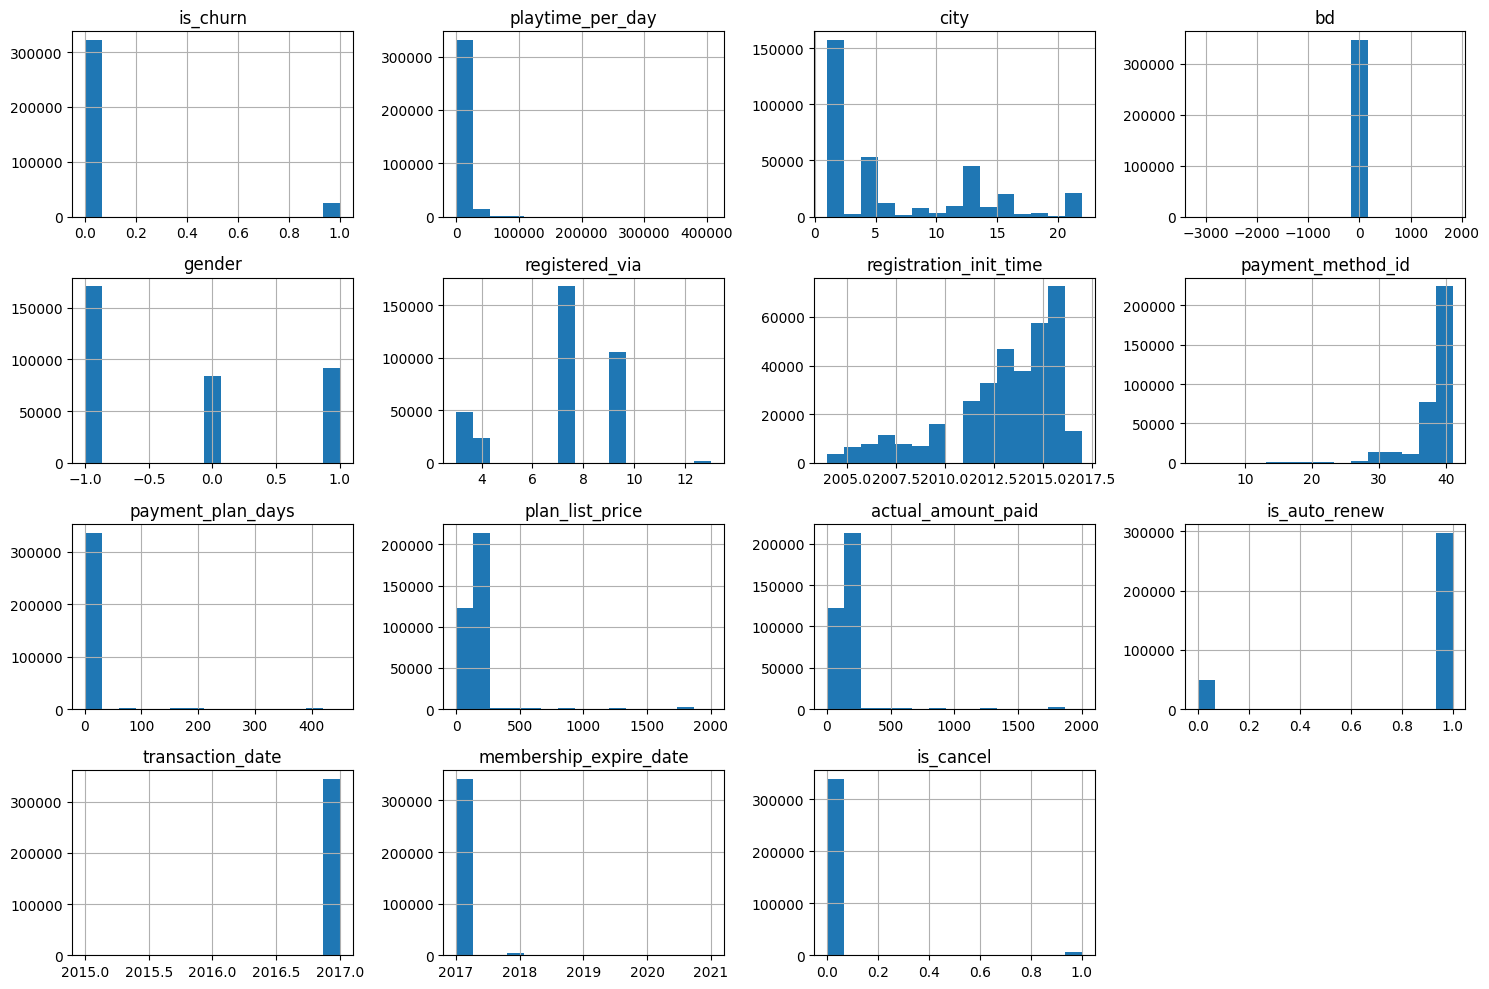

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns (we've converted everything to numeric already)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


### Initial Data Exploration and Visualization

1. `is_churn` (Target Variable):
The target variable shows a significant class imbalance, which is common in churn prediction problems. In practice, the number of customers who stay with the service (non-churn) often outweighs those who leave (churn). We'll have to carefully manage this during the model training process to ensure that the model does not become biased toward predicting the majority class.

2. `bd` (Age):
The age distribution with its peaks and a notable number of zeros suggests potential data quality issues or a representation of missing/unreported data. Age can be a significant factor in churn prediction, as user engagement and preferences can vary widely across different age groups. We'll clean this up right now by removing the outliers and zeros.


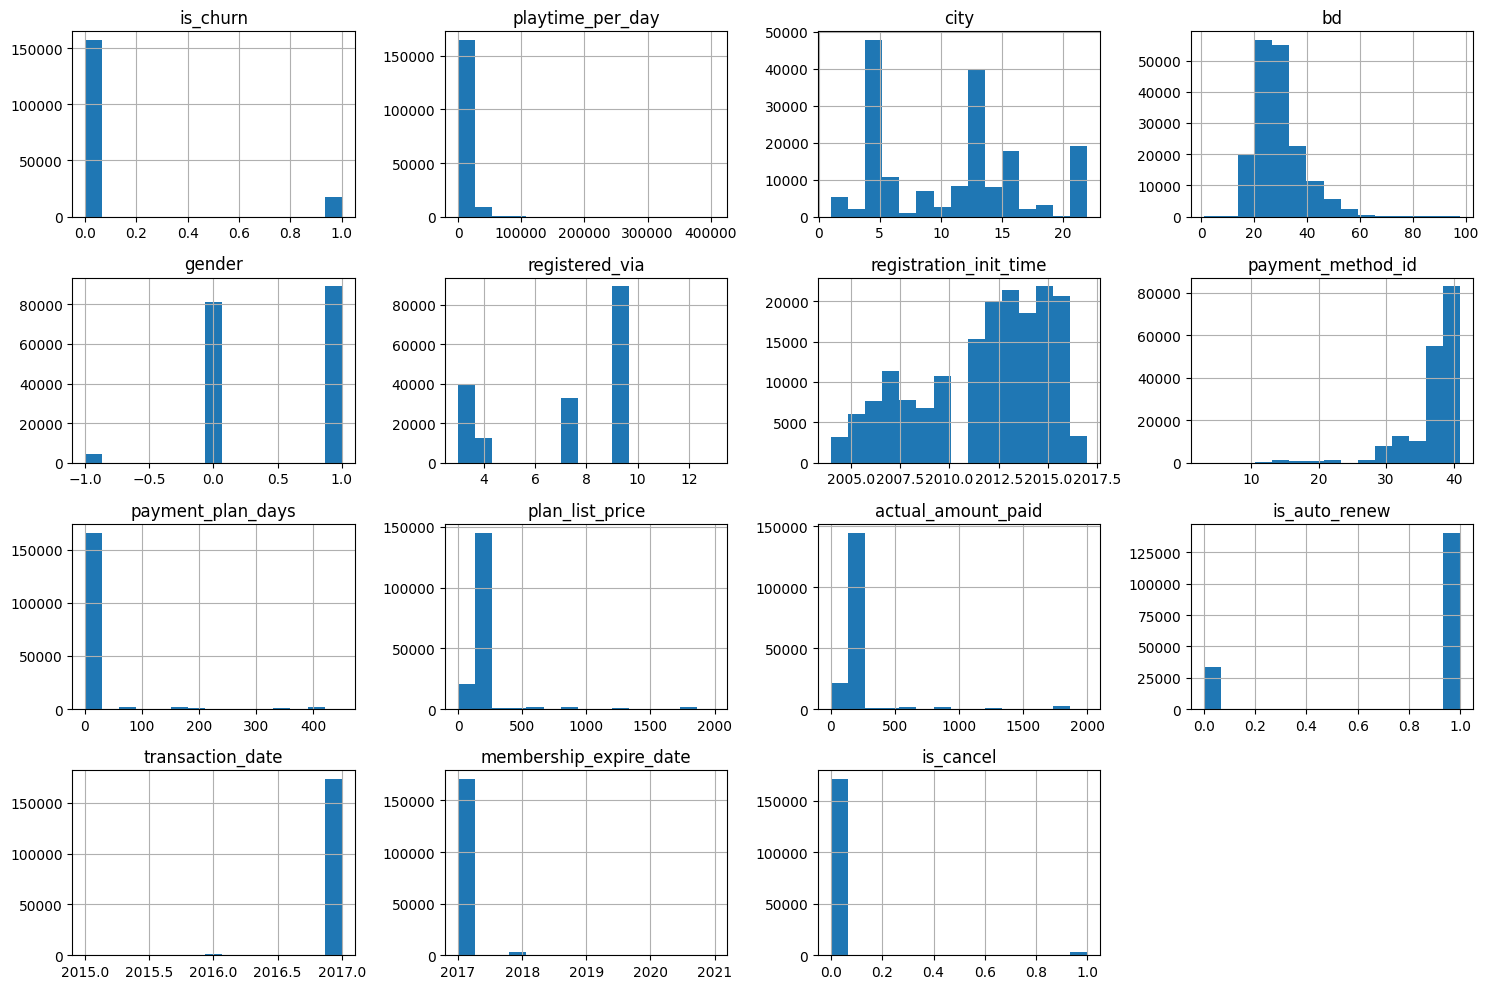

In [53]:
# remove outliers and zeros from `bd` column
df = df[(df['bd'] > 0) & (df['bd'] < 100)]

# replot histogram
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


3. `payment_plan_days` and `actual_amount_paid`: Both features show specific peaks which indicate common payment plans and amounts. These financial features are often directly correlated with churn because they reflect the customer's commitment and perceived value from the service. For example, customers on longer-term plans or those who receive discounts may be less likely to churn. We'll explore this further in the feature selection stage.

4. `is_auto_renew`: The majority of users appear to be on auto-renewal plans. This feature is typically a strong predictor of churn since auto-renewing customers may be less likely to leave unless they are actively dissatisfied.

5. `is_cancel`: This binary feature indicates whether a user has canceled a subscription. A cancellation is often a precursor to churn, making this feature likely to be highly predictive.

### Correlation Heatmap for Numeric Features

This shows the correlation between numeric features.

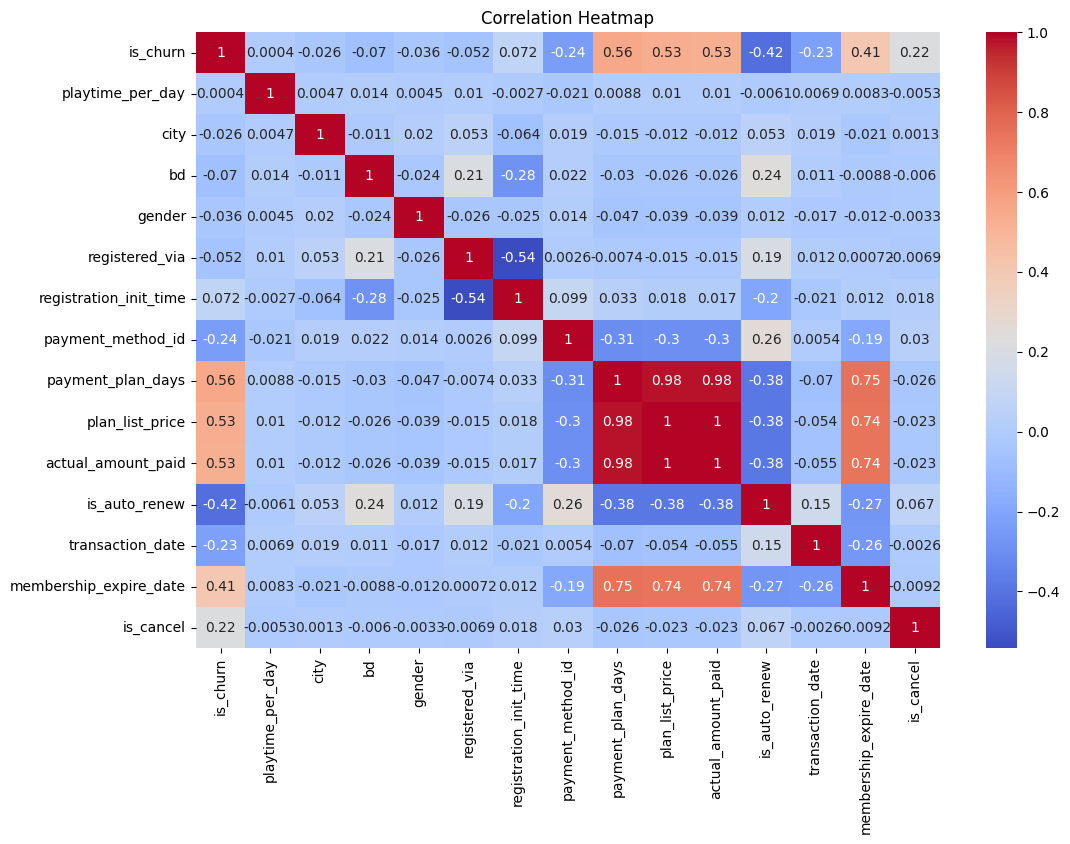

In [54]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Here we see that `payment_plan_days`, `actual_amount_paid`, and `plan_list_price` are almost perfectly correlated, as well as `transaction_date`, and `membership_expire_date`. This makes sense since they are all related to the customer's payment plan and related transaction dates. We'll have to be careful about multicollinearity when we select features for our models.



### Plot Churn Rate by Features

Now let's take a look at how churn rate varies across different features. First we'll look at registration year and city. TODO: expand this

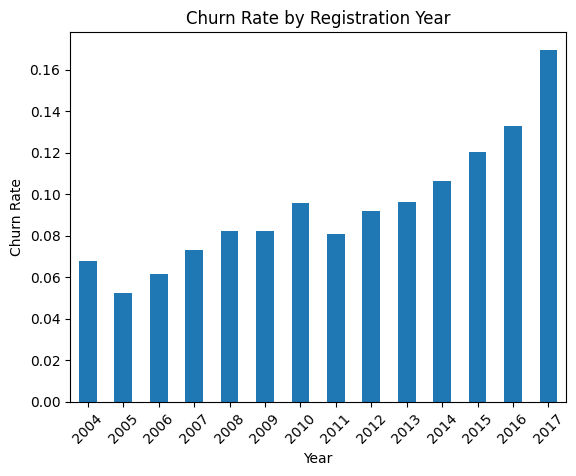

In [55]:
# Assuming registration_init_time is in the format YYYY
df['registration_year'] = pd.to_datetime(df['registration_init_time'], format='%Y')

# Group by registration year and calculate churn rate
churn_over_years = df.groupby(df['registration_year'].dt.year)['is_churn'].mean()

churn_over_years.plot(kind='bar')
plt.title('Churn Rate by Registration Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


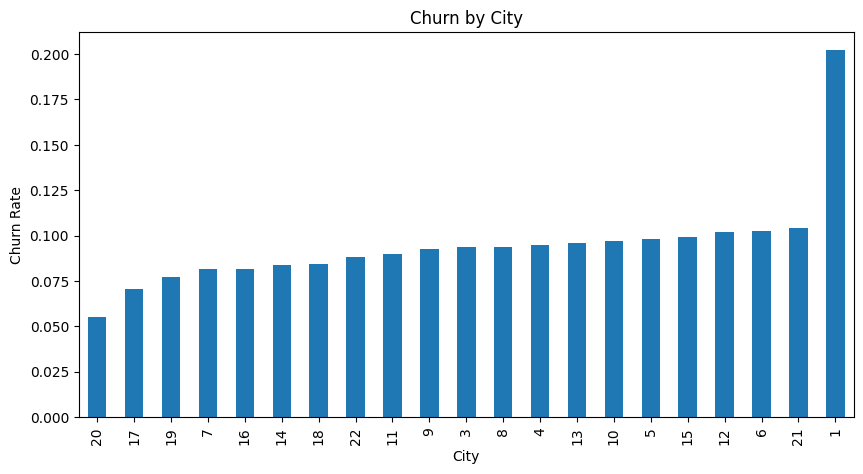

In [57]:
#churn by city
city_churn = df.groupby('city')['is_churn'].mean().sort_values()
city_churn.plot(kind='bar', figsize=(10, 5))
plt.title('Churn by City')
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.show()


In [ ]:
# churn by gender
sns.countplot(x='gender', hue='is_churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.xticks(range(len(gender)), ['Gender1', 'Gender2'])  # Replace with actual gender names
plt.show()


In [ ]:
#churn by payment method
payment_method_churn = churn_df.groupby('payment_method_id')['is_churn'].mean().sort_values()
payment_method_churn.plot(kind='bar', figsize=(10, 5))
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method ID')
plt.ylabel('Churn Rate')
plt.show()


In [ ]:
#churn by auto renewal
sns.countplot(x='is_auto_renew', hue='is_churn', data=churn_df)
plt.title('Churn by Auto-Renew Status')
plt.xlabel('Auto-Renew Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


TODO: summarize visualizations

# Class Imbalance

Class imbalance refers to a situation in a dataset where the classes are not represented equally. Here, we see that only about 6.96% of the users have churned (positive class), while a vast majority, 93.04%, have not churned (negative class).

In [81]:
# Identify features and target variable
X = df.drop(['is_churn'], axis=1)
y = df['is_churn']

yes_count = df['is_churn'].value_counts().get(1, 0)
no_count = df['is_churn'].value_counts().get(0, 0)
print(f"count of churned users: {yes_count}")
print(f"count of non-churned users: {no_count}")

yes_percent = (yes_count / (yes_count + no_count)) * 100
no_percent = (no_count / (yes_count + no_count)) * 100

print(f"Percentage of churned users: {yes_percent:.2f}%")
print(f"Percentage of non-churned users: {no_percent:.2f}%")


count of churned users: 24092
count of non-churned users: 321962
Percentage of churned users: 6.96%
Percentage of non-churned users: 93.04%


 This imbalance can significantly affect the performance of machine learning models and needs to be addressed for several reasons:

- Model Bias Towards Majority Class: Most machine learning algorithms are designed to maximize overall accuracy. In the presence of class imbalance, this often results in a bias towards the majority class. Your model might simply learn to predict the majority class (non-churned users) most of the time, as this would yield a high accuracy due to the skewed class distribution.

- Ineffective Error Evaluation: Traditional metrics like accuracy can be misleading in imbalanced datasets. Even if your model predicts 'non-churn' for all users, it would still be about 93% accurate, masking its ineffectiveness in identifying churned users.

- Poor Generalization for Minority Class: Since there are fewer instances of the minority class (churned users), the model may not learn enough about the characteristics of churned users. This could lead to poor generalization and an inability to identify churned users effectively in new, unseen data.

There are several strategies for addressing class imbalance, including:

- Resampling Techniques: Adjust the dataset to have a more balanced distribution. This can be done either by oversampling the minority class (increasing the number of churned users in the dataset) or undersampling the majority class (decreasing the number of non-churned users).

- Synthetic Data Generation: Tools like SMOTE (Synthetic Minority Over-sampling Technique) can be used to create synthetic examples of the minority class, thereby balancing the class distribution without losing valuable information.

- Adjusted Class Weights: Some algorithms allow for the adjustment of class weights to make the model more sensitive to the minority class.

- Evaluation Metrics: Use metrics that are more informative for imbalanced datasets, such as precision, recall, F1-score, or the Area Under the ROC Curve (AUC-ROC).

- Anomaly Detection Techniques: Since the minority class is rare, treating the problem as anomaly detection can sometimes yield better results.

# Classifier Models

For this project, we'll be using the following classifier models:

- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost

Then we'll compare their performance against custom Deep Learning models built with Pytorch.

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt


#Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


is_churn
0    19274
1    19274
Name: count, dtype: int64
Evaluating KNN Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     64393
           1       0.91      0.45      0.61      4818

    accuracy                           0.96     69211
   macro avg       0.94      0.73      0.79     69211
weighted avg       0.96      0.96      0.95     69211

Accuracy: 0.9590816488708442
ROC AUC: 0.7588798587920738
Precision-Recall AUC: 0.5159298217830176
Confusion matrix: [[64189   204]
 [ 2628  2190]]
Evaluating Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     64393
           1       0.55      0.59      0.57      4818

    accuracy                           0.94     69211
   macro avg       0.76      0.78      0.77     69211
weighted avg       0.94      0.94      0.94     69211

Accuracy: 0.9377122133764864
ROC AUC: 0.7751693776522264
Precision-Recall AUC:

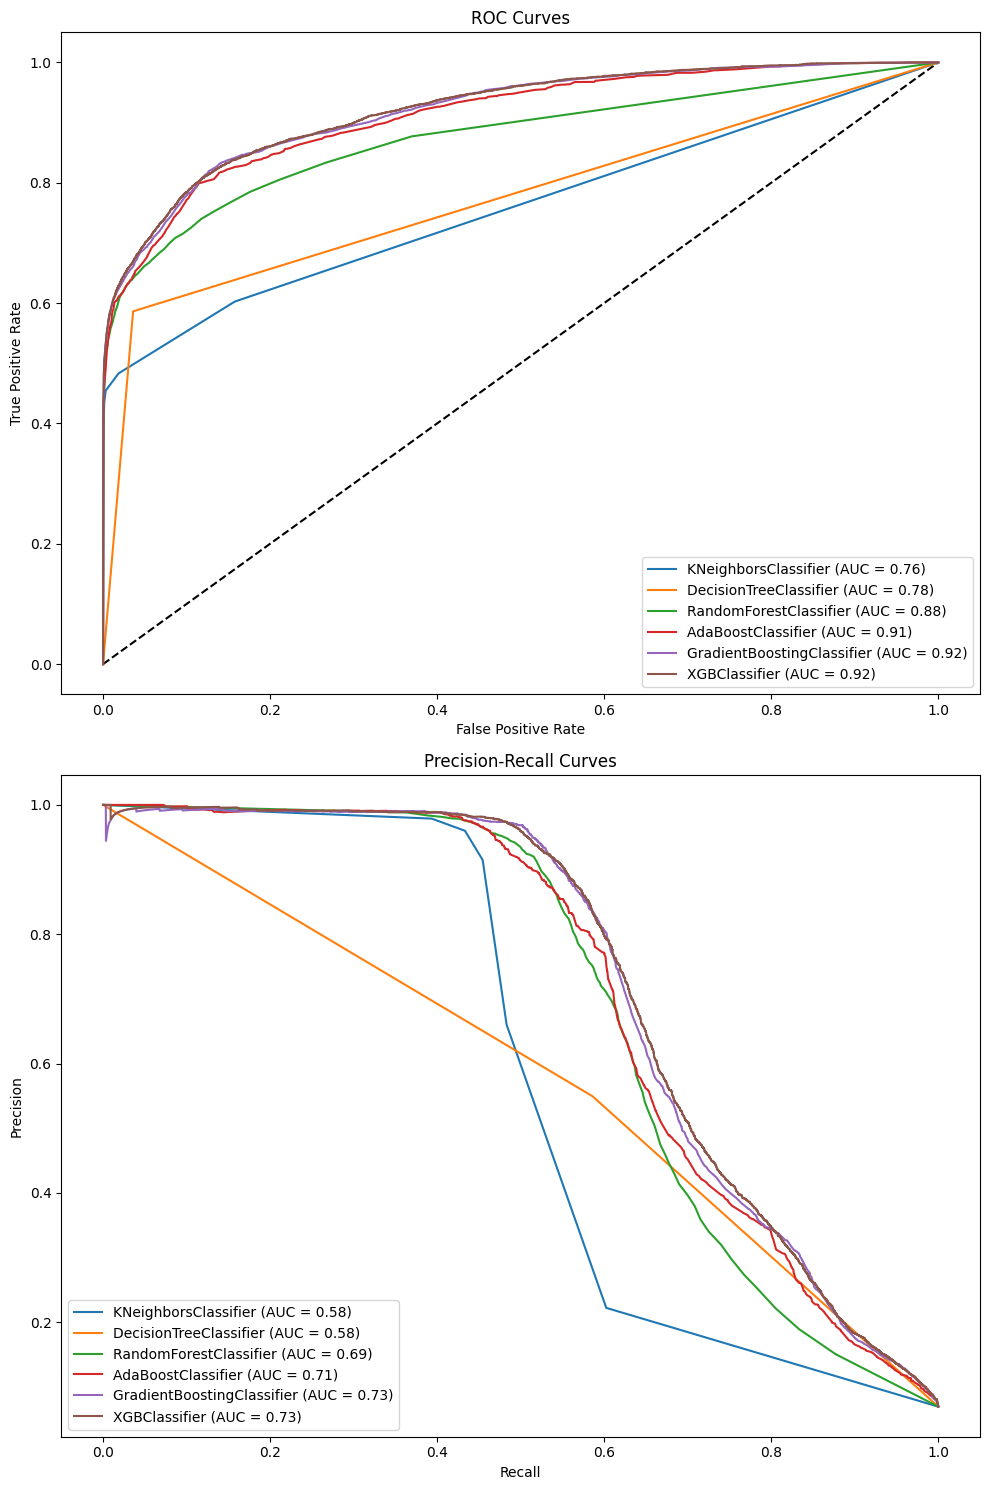

In [89]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Combine X_train and y_train into a single DataFrame for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Identify the minority class label
minority_class_label = train_data['is_churn'].value_counts().idxmin()

# Apply random undersampling on imbalanced target data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_data.drop('is_churn', axis=1), train_data['is_churn'])
print(y_resampled.value_counts())

from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, auc

# Initialize a dictionary to store the metrics
metrics = {
    "Accuracy": [],
    "ROC AUC": [],
    "Precision-Recall AUC": [],
    "F1 Score": []
}

def evaluate_classifier(clf, X_train, y_train, X_test, y_test, ax_roc, ax_pr):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    metrics["Accuracy"].append(accuracy)
    metrics["ROC AUC"].append(roc_auc)
    metrics["Precision-Recall AUC"].append(pr_auc)
    metrics["F1 Score"].append(f1)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    ax_roc.plot(fpr, tpr, label=f'{clf.__class__.__name__} (AUC = {auc(fpr, tpr):.2f})')
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ax_pr.plot(recall, precision, label=f'{clf.__class__.__name__} (AUC = {auc(recall, precision):.2f})')

# Initialize figure and axes for the grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Set titles and labels for the plots
axes[0].set_title('ROC Curves')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].plot([0, 1], [0, 1], 'k--')

axes[1].set_title('Precision-Recall Curves')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"Evaluating {name} Classifier:")
    evaluate_classifier(clf, X_train, y_train, X_test, y_test, axes[0], axes[1])

# Add legends to the plots
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower left")

# Convert the metrics to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=classifiers.keys())

# Plot the metrics
metrics_df.plot(kind='bar', ax=axes[2])
axes[2].set_title('Classifier Metrics')
axes[2].set_ylabel('Score')

# Show the plots
plt.tight_layout()
plt.show()


### Feature Importance

Now we get to the data mining and machine learning. We'll start by selecting the most important features for predicting churn. We'll use a combination of statistical and machine learning techniques to identify the most impactful features. Our first approach is to use a Random Forest classifier to rank the features by importance. 

By constructing numerous decision trees during training and aggregating their outcomes, Random Forest Classifiers achieve high accuracy and robustness against overfitting. Each tree is developed from a bootstrap sample of the training set, and features are randomly selected for splits within the trees. This randomness not only improves predictive accuracy but also helps in managing complex datasets with many features, as it effectively captures non-linear relationships between variables.

The utility of Random Forest classifiers adapt well to both binary and multi-class scenarios, often requiring minimal parameter tuning to yield reliable results. Additionally, their inherent feature selection process offers insights into the importance of different variables, making them a preferred choice for initial explorations in complex data environments.


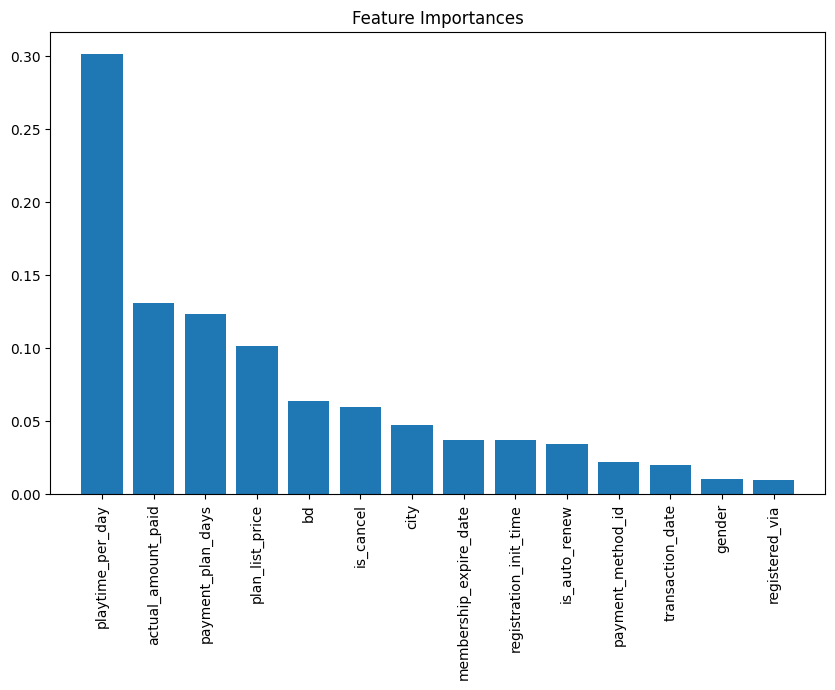

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

X = df.drop('is_churn', axis=1)
y = df['is_churn']
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
